# Introdução

Este notebook apresenta uma exploração inicial do conjunto de dados de análise, investigando diferentes atributos presentes no mesmo.

In [1]:
import pandas as pd 
import json

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize": (20, 10)})

remove_duplicates = False

# 1. Carregando os dados

In [2]:
data_df = pd.read_csv("../data/tech_test.tsv", sep="\t")

In [3]:
data_df.columns

Index(['retailer', 'category', 'breadcrumb', 'brand', 'offer_url', 'offer_sku',
       'offer_retailer', 'offer_title', 'title_keywords', 'price', 'specs',
       'offer_last_update_at', 'review_id', 'review_title', 'review_body',
       'review_user_rating', 'review_posted_at', 'review_year', 'review_month',
       'review_week', 'review_day', 'review_collected_at', 'locale',
       'original_offer', 'variant'],
      dtype='object')

In [4]:
if remove_duplicates: data_df.drop_duplicates("review_id", inplace=True)

In [5]:
data_df.head()

,retailer,category,breadcrumb,brand,offer_url,offer_sku,offer_retailer,offer_title,title_keywords,price,...,review_user_rating,review_posted_at,review_year,review_month,review_week,review_day,review_collected_at,locale,original_offer,variant
0,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side ...",General Electric,https://www.lowes.com/pd/GE-25-3-cu-ft-Side-by...,1000859768,lowes,GE 25.3-cu ft Side-by-Side Refrigerator with I...,25.3':2 'by':7 'cu':3 'fingerprint':14 'finger...,NaN,...,3,2020-03-23,2020,3,13,23,2020-04-24 15:58:56,us,True,"['1000859768', '1000859852']"
1,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""Side-by-Side ...",General Electric,https://www.lowes.com/pd/GE-25-1-cu-ft-Side-by...,1000859852,lowes,GE 25.1-cu ft Side-by-Side Refrigerator with I...,25.1':2 'black':13 'by':7 'cu':3 'ft':4 'ge':1...,NaN,...,3,2020-03-23,2020,3,13,23,2020-04-24 14:55:13,us,False,"['1000859768', '1000859852']"
2,lowes,Refrigerators,"[""Appliances"", ""Refrigerators"", ""French Door R...",Frigidaire,https://www.lowes.com/pd/Frigidaire-Gallery-21...,1000289721,lowes,Frigidaire Gallery 21.7-cu ft Counter-depth Fr...,21.7':3 'counter':7 'counter-depth':6 'cu':4 '...,NaN,...,5,2019-09-28,2019,9,39,28,2020-03-30 23:53:02,us,True,['1000289721']
3,bestbuy_us,Refrigerators,"[""Best Buy"", ""Appliances"", ""Refrigerators"", ""B...",Whirlpool,https://www.bestbuy.com/site/whirlpool-21-9-cu...,3928039,bestbuy_us,Whirlpool - 21.9 Cu. Ft. Bottom-Freezer Refrig...,21.9':2 'bottom':6 'bottom-freezer':5 'cu':3 '...,NaN,...,5,2019-12-13,2019,12,50,13,2020-04-28 14:09:38,us,True,"['3928039', '3928048', '3979801', '6112639']"
4,bestbuy_us,Refrigerators,"[""Best Buy"", ""Appliances"", ""Refrigerators"", ""B...",Whirlpool,https://www.bestbuy.com/site/whirlpool-21-9-cu...,3979801,bestbuy_us,Whirlpool - 21.9 Cu. Ft. Bottom-Freezer Refrig...,21.9':2 'black':9 'bottom':6 'bottom-freezer':...,NaN,...,5,2019-12-13,2019,12,50,13,2020-04-28 14:09:42,us,False,"['3928039', '3928048', '3979801', '6112639']"


# 2. Contabilizando avaliações

In [6]:
aval_df = data_df.groupby("review_user_rating").count()[["retailer"]]
aval_df.columns = ["quantity"]

In [7]:
aval_df

,quantity
review_user_rating,
1,1236
2,695
3,1584
4,5584
5,11374


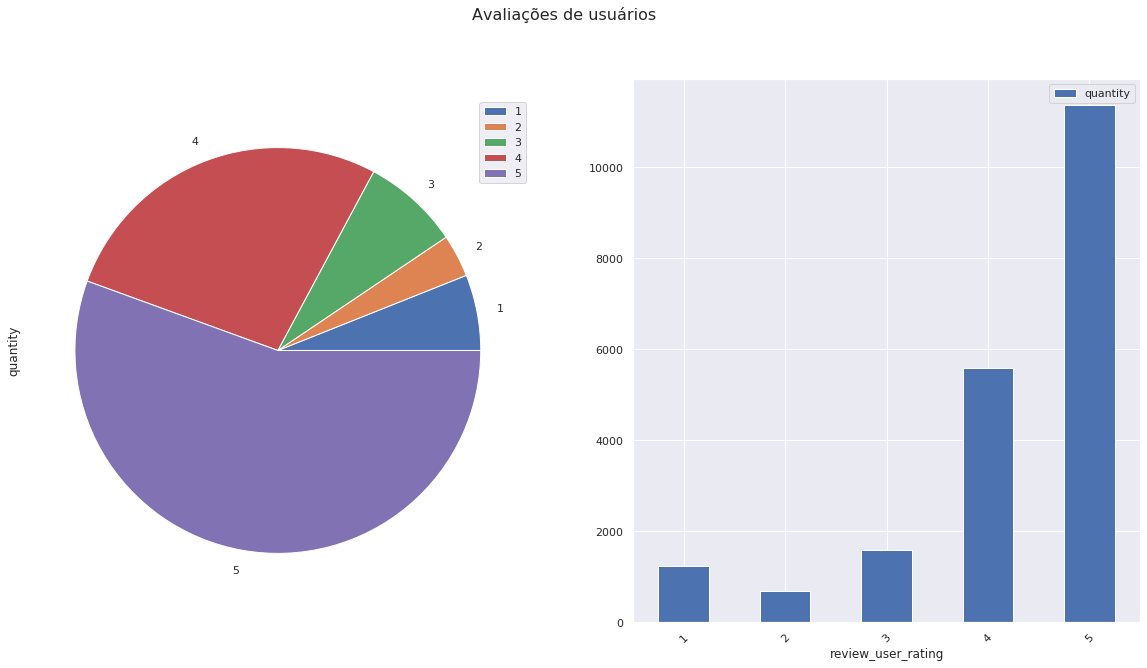

In [8]:
# aval_df.plot.bar(rot=45)
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Avaliações de usuários', fontsize=16)

aval_df.plot.pie(y="quantity", ax=axes[0])
aval_df.plot.bar(rot=45, ax=axes[1])

# 3. Determinando marcas com melhores reviews

Determinou-se a média das reviews de cada marca para esta análise.

In [9]:
# Possíveis avaliações
data_df["review_user_rating"].unique()

array([3, 5, 2, 4, 1])

In [10]:
# Marcas
len(data_df["brand"].unique())

52

In [11]:
brands_df = data_df[["brand", "review_user_rating"]].groupby("brand").mean()

In [12]:
brands_df.sort_values(by="review_user_rating", ascending=False).head(20)

,review_user_rating
brand,
Akdy,5.000000
Thomson,5.000000
Nostalgia,5.000000
Gladiator,5.000000
Farberware,5.000000
Edgestar,5.000000
Danby Designer,5.000000
Silhouette,5.000000
Cosmo,5.000000


# 4. Determinando marcas com maior quantidade de produtos avaliados

In [13]:
reviews_df = data_df[["brand", "review_user_rating"]].groupby("brand").count()


In [14]:
reviews_df.columns = ["quantity"]
reviews_df.sort_values(by="quantity", ascending=False, inplace=True)

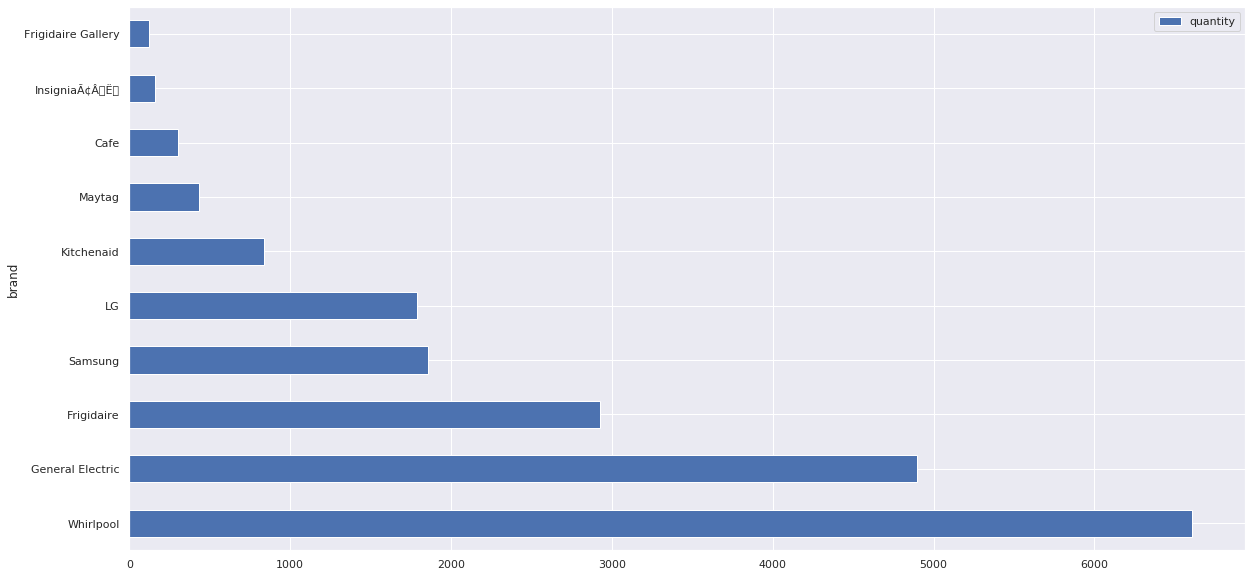

In [15]:
reviews_df.head(10).plot.barh()

# 5. Revendedores com melhores avaliações

Idem exemplo anterior, para os revendedores.

In [16]:
retailer_df = data_df[["offer_retailer", "review_user_rating"]].groupby("offer_retailer").mean()

In [17]:
retailer_df.sort_values(by="review_user_rating", ascending=False).head()

,review_user_rating
offer_retailer,
samsung_us,4.404110
walmart_us,4.374622
lowes,4.278105
samsclub,4.250000
bestbuy_us,4.227348


# 6. Contabilizando ids de review únicos

In [18]:
len(data_df.review_id.unique())

6284

# 7. Separando dados para análise

Separamos os dados em reviews extramente positivas (avaliação igual a 5) e extremamente negativas (avaliação igual a 1). Partindo da hipótese de que reviews extremamente positivos (negativos) possuem apenas aspectos positivos (negativos) no seu corpo, estas reviews constituem, então, uma boa fonte de aspectos filtrados para análise. Outro motivo para amostrar o conjunto de dados original é o tamanho do corpo original. Trabalhar com conjuntos de texto menores torna mais fácil carregar os dados em memória.

In [19]:
# Alternativa
# data_df[data_df["review_user_rating"] > 2]
# data_df[data_df["review_user_rating"] <= 2]

extreme_positive = data_df[data_df["review_user_rating"] == 5]
extreme_negative = data_df[data_df["review_user_rating"] == 1]

extreme_positive.to_csv("../data/extreme_positive.csv")
extreme_negative.to_csv("../data/extreme_negative.csv")